In [2]:
import gymnasium as gym
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

#### 👉We are using the `Taxi-v3` environment from OpenAI's gym: https://gym.openai.com/envs/Taxi-v3/

#### 👉`Taxi-v3` is an easy environment because the action space is small, and the state space is large but finite.

#### 👉Environments with a finite number of actions and states are called tabular

#### Actions
There are 6 discrete deterministic actions:

- 0: move south

- 1: move north

- 2: move east

- 3: move west

- 4: pickup passenger

- 5: drop off passenger
#### Rewards
- -1 per step unless other reward is triggered.
- +20 delivering passenger.
- -10 executing “pickup” and “drop-off” actions illegally.

In [3]:
env=gym.make("Taxi-v3",  render_mode="rgb_array")

In [4]:
class RandomAgent:
    def __init__(self, env):
        self.env = env 
    
    def get_Random_Action(self):
        return self.env.action_space.sample()

### create a random Agent interacting with "Taxi-v3" environment

In [5]:
agent = RandomAgent(env)

### Train the Random agent on multiples episodes

In [6]:
n_episodes = 100

timesteps_per_episode = []
cumReward_per_episode = []
penalties_per_episode = []

for i in tqdm(range(n_episodes)):
    state, info = env.reset()

    steps, penalties, cum_reward = 0, 0, 0
    done = False

    while not done:

        action = agent.get_Random_Action()

        next_state, reward, terminated, truncated, info = env.step(action)

        if reward == -10:
            penalties += 1
        else:
            cum_reward += reward

        steps += 1
        done = terminated or truncated

    timesteps_per_episode.append(steps)
    cumReward_per_episode.append(cum_reward)
    penalties_per_episode.append(penalties)


100%|██████████| 100/100 [00:00<00:00, 385.18it/s]


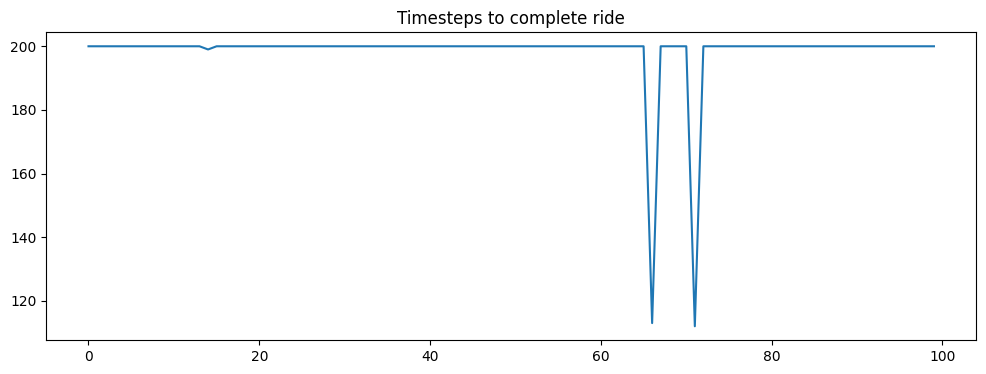

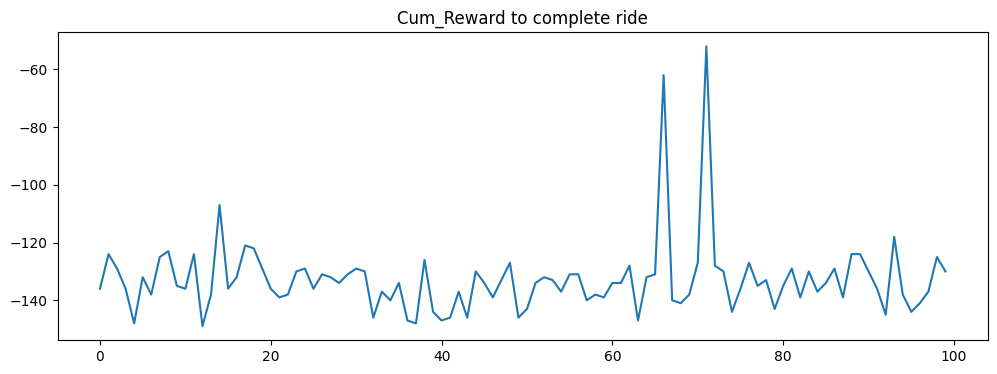

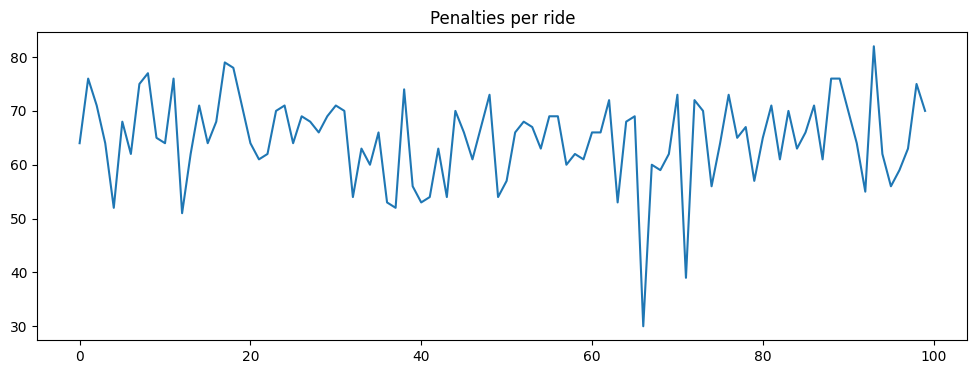

In [7]:

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Timesteps to complete ride")    
pd.Series(timesteps_per_episode).plot(kind="line")
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Cum_Reward to complete ride")    
pd.Series( cumReward_per_episode).plot(kind="line")
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Penalties per ride")    
pd.Series(penalties_per_episode).plot(kind="line")
plt.show()